In [2]:
import numpy as np
import anndata
import os
import sys
import re
import matplotlib.pyplot as plt
import scipy.stats
import math

In [73]:
np.round(0.123412312354, 5)

0.12341

In [89]:
def describe(array):

    print(f'MEAN: {np.mean(array):.5f}')
    print(f'MEDIAN: {np.median(array):.5f}')
    print(f'MAX: {np.max(array):.5f}')
    print(f'MIN: {np.min(array):.5f}')

def describe_no_zeros(array):
    array = array[array!=0]
    print(f'MEAN: {np.mean(array):.5f}')
    print(f'MEDIAN: {np.median(array):.5f}')
    print(f'MAX: {np.max(array):.5f}')
    print(f'MIN: {np.min(array):.5f}')

In [4]:
adata = anndata.read_h5ad("../../../../../pipeline42/datasets/TabulaSapiens/normalized/TS_Liver.h5ad")

In [24]:
adata

AnnData object with n_obs × n_vars = 5007 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender', 'X_counts_UMIs'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'organ_tissue_colors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'depth_normalized', 'raw_counts'
    obsp: 'connectivities', 'distances'

# Non-Normalized

### First Cell


In [90]:
describe(adata.X[0].toarray())

MEAN: 0.09561
MEDIAN: 0.00000
MAX: 10.00000
MIN: 0.00000


In [91]:
describe_no_zeros(adata.X[4].toarray()[0])

MEAN: 2.66523
MEDIAN: 2.28865
MAX: 10.00000
MIN: 0.66595


So The avg UMI is abou 2.49

### RAW UMI Distribution

Text(0, 0.5, 'Number of genes in bin')

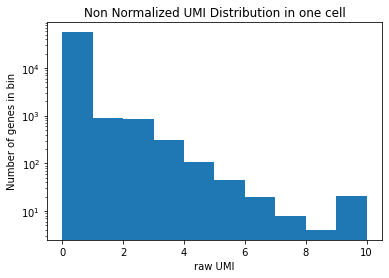

In [7]:
plt.hist((adata.X[0].toarray()[0]), bins = 10)
plt.yscale("log")
plt.title('Non Normalized UMI Distribution in one cell')
plt.xlabel('raw UMI')
plt.ylabel("Number of genes in bin")

Text(0, 0.5, 'Log Scaled Count')

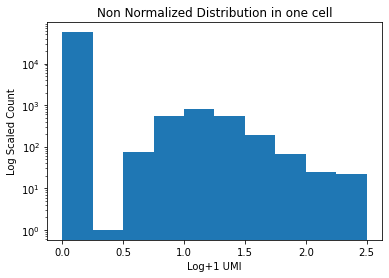

In [8]:
plt.hist(np.log(adata.X[0].toarray()[0]+1), bins = 10, range = (0,2.5))
plt.yscale("log")
plt.title('Non Normalized Distribution in one cell')
plt.xlabel('Log+1 UMI')
plt.ylabel("Log Scaled Count")

### Second Cell


Text(0, 0.5, 'Log Scaled Count')

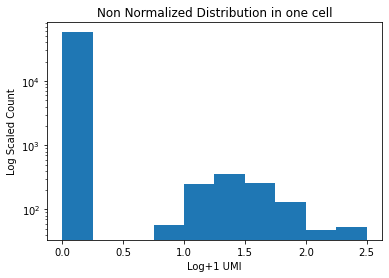

In [9]:
plt.hist(np.log(adata.X[1].toarray()[0]+1), bins = 10, range = (0,2.5))
plt.yscale("log")
plt.title('Non Normalized Distribution in one cell')
plt.xlabel('Log+1 UMI')
plt.ylabel("Log Scaled Count")

### Two Cells


Text(0, 0.5, 'Log Scaled Count')

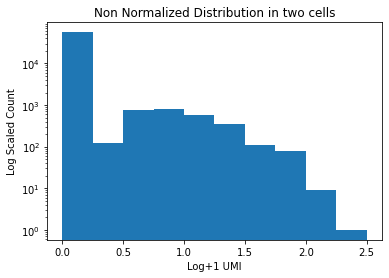

In [10]:
plt.hist(np.log(np.mean(adata.X[0:2].toarray(), axis = 0) + 1 ), bins = 10, range = (0,2.5))
plt.yscale("log")
plt.title('Non Normalized Distribution in two cells')
plt.xlabel('Log+1 UMI')
plt.ylabel("Log Scaled Count")

### All Cells


Text(0, 0.5, 'Number of genes in bin')

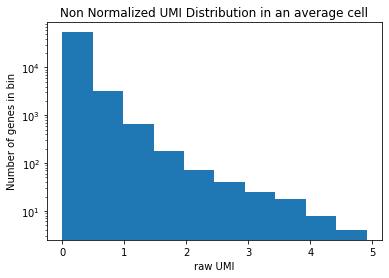

In [10]:
plt.hist((np.mean(adata.X.toarray(), axis = 0 )), bins = 10)
plt.yscale("log")
plt.title('Non Normalized UMI Distribution in an average cell')
plt.xlabel('raw UMI')
plt.ylabel("Number of genes in bin")

In [12]:
describe(adata.X.toarray())

MEAN: 0.1114092618227005
MEDIAN: 0.0
MAX: 10.0
MIN: 0.0


# It looks like he MAX's are all 10...

Appears like cells are already normalized between cells.

If they are already scaled so that they have comparable UMIs, then what does that mean for me...

The weird thing is that the rows do not sum to the same value, so its not depth normalized..


(array([   0.,    0.,    0.,    0.,    0., 5007.,    0.,    0.,    0.,
           0.]),
 array([ 9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5],
       dtype=float32),
 <BarContainer object of 10 artists>)

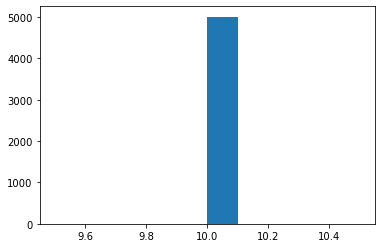

In [23]:
plt.hist(np.max(adata.X.toarray(), axis = 1))

In [36]:
adata.X.toarray()[adata.X.toarray() !=0]

array([2.3135314, 2.017924 , 1.7682451, ..., 2.0721047, 2.169558 ,
       1.3764149], dtype=float32)

# UMI Row Sums

Text(0, 0.5, 'count')

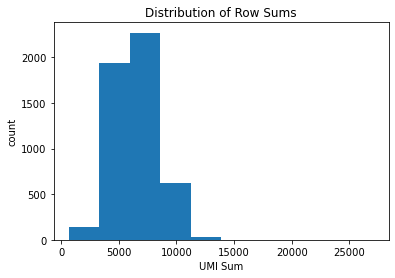

In [130]:
plt.hist(adata.obs.X_counts_UMIs)
plt.title("Distribution of Row Sums")
plt.xlabel("UMI Sum")
plt.ylabel("count")

In [92]:
describe(adata.obs.X_counts_UMIs)

MEAN: 6558.64893
MEDIAN: 6369.52979
MAX: 27065.22266
MIN: 677.14124


So the average row sum is 6558

## Normalized

### First Cell

In [53]:
describe(np.log(adata.layers['depth_normalized'][0].toarray()[0]+1))

MEAN: 1.6981813556218777e-05
MEDIAN: 0.0
MAX: 0.001775039260365675
MIN: 0.0


In [54]:
describe_no_zeros(np.log(adata.layers['depth_normalized'][0].toarray()[0]+1))

MEAN: 0.0004425495192804778
MEDIAN: 0.00038933616417261615
MAX: 0.001775039260365675
MIN: 0.00011234242771123362


Text(0, 0.5, 'Log Scaled Count')

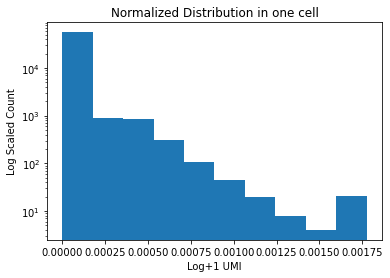

In [55]:
plt.hist(np.log(adata.layers['depth_normalized'][0].toarray()[0]+1), bins = 10)
plt.yscale("log")
plt.title('Normalized Distribution in one cell')
plt.xlabel('Log+1 UMI')
plt.ylabel("Log Scaled Count")

### All Cells

In [62]:
adata.layers['depth_normalized']

<5007x58870 sparse matrix of type '<class 'numpy.float64'>'
	with 12047253 stored elements in Compressed Sparse Row format>

In [61]:
array = np.log2(np.mean(adata.layers['depth_normalized'].toarray(), axis = 0 )+1)
#depth normalized, with  log transformation

In [93]:
describe(array)

MEAN: 0.00002
MEDIAN: 0.00000
MAX: 0.00112
MIN: 0.00000


In [95]:
array.shape

(58870,)

In [94]:
describe_no_zeros(array)

MEAN: 0.00004
MEDIAN: 0.00000
MAX: 0.00112
MIN: 0.00000


Text(0, 0.5, 'Genes with UMI count')

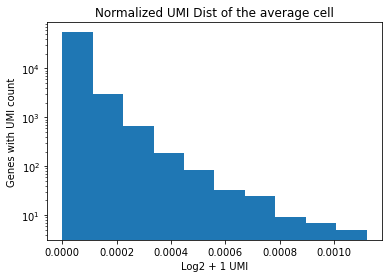

In [96]:
plt.hist(np.log(array+1))
plt.yscale("log")
plt.title('Normalized UMI Dist of the average cell')
plt.xlabel('Log2 + 1 UMI')
plt.ylabel("Genes with UMI count")

